In [ ]:
from google.colab import files
uploaded = files.upload()

Saving traffic_video.mp4 to traffic_video.mp4


In [ ]:
import cv2

video_path = list(uploaded.keys())[0]  # Gets the uploaded filename
cap = cv2.VideoCapture(video_path)


In [ ]:
import torch

# Load YOLOv5s model from Ultralytics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', trust_repo=True)
# Only detect vehicles: car, motorcycle, bus, truck
model.classes = [2, 3, 5, 7]


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-6-14 Python-3.11.13 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 126MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


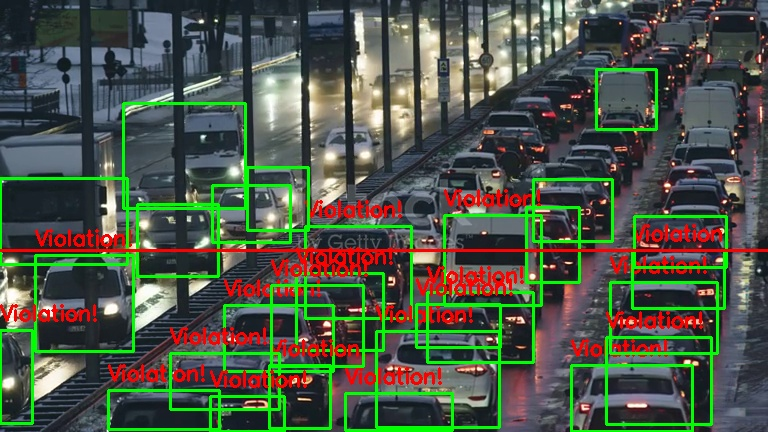

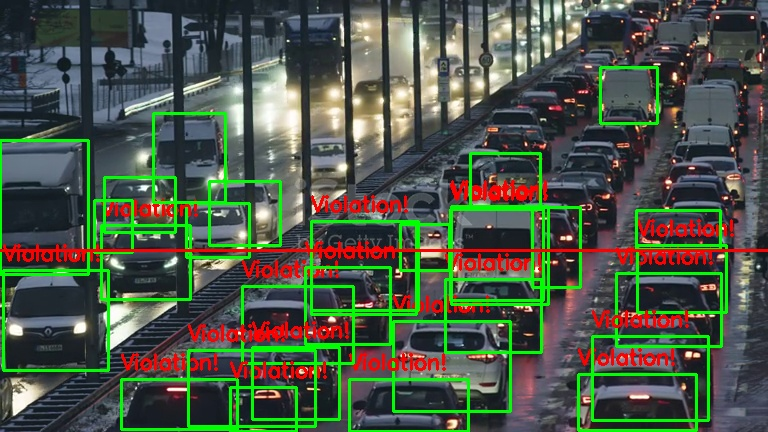

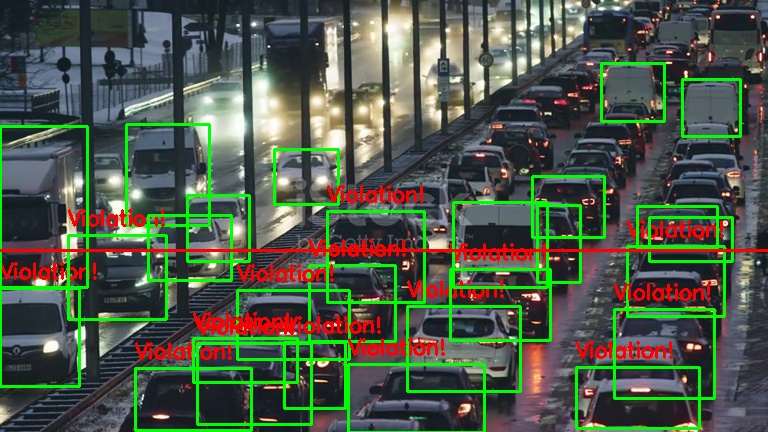

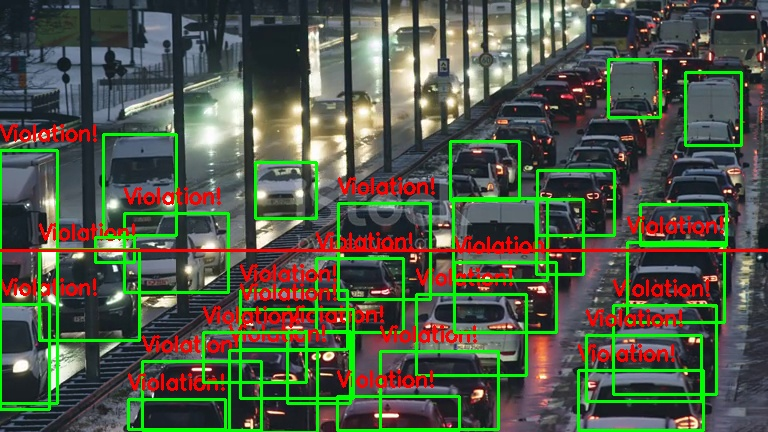

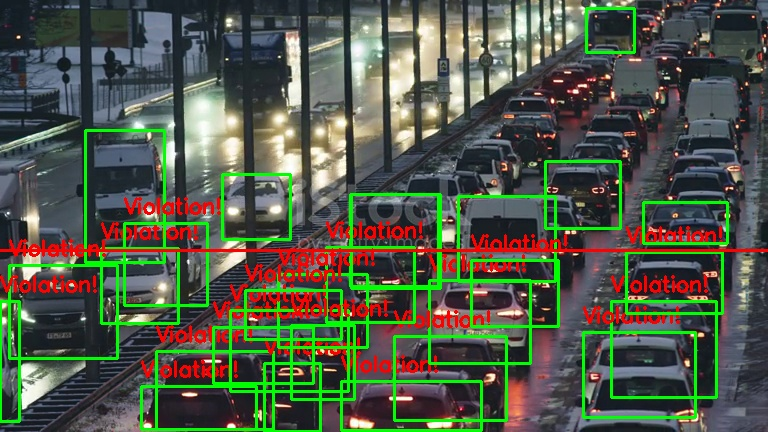

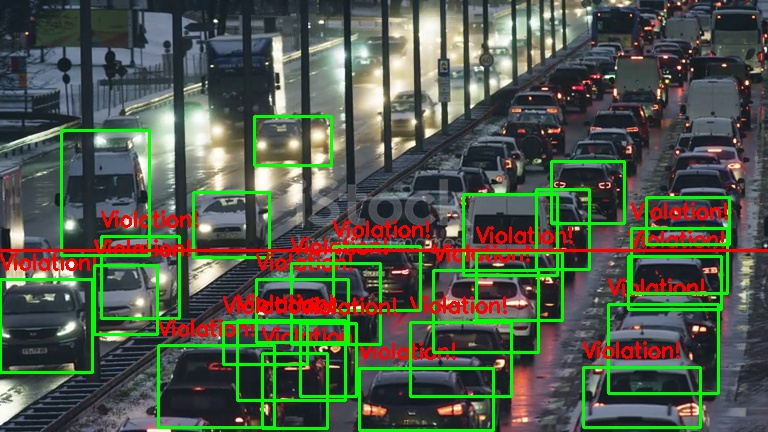

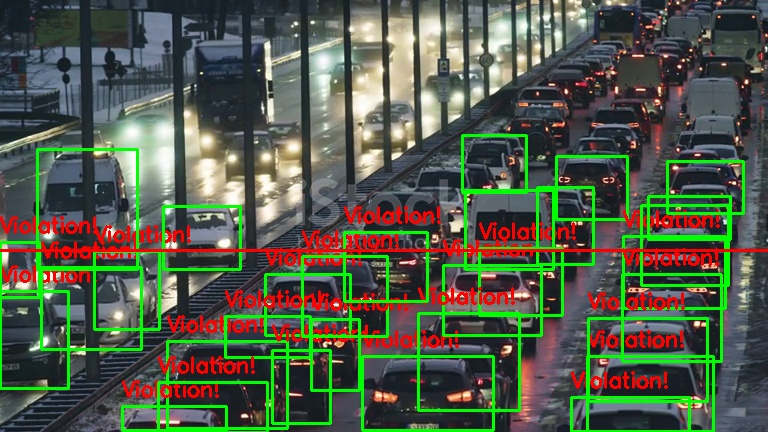

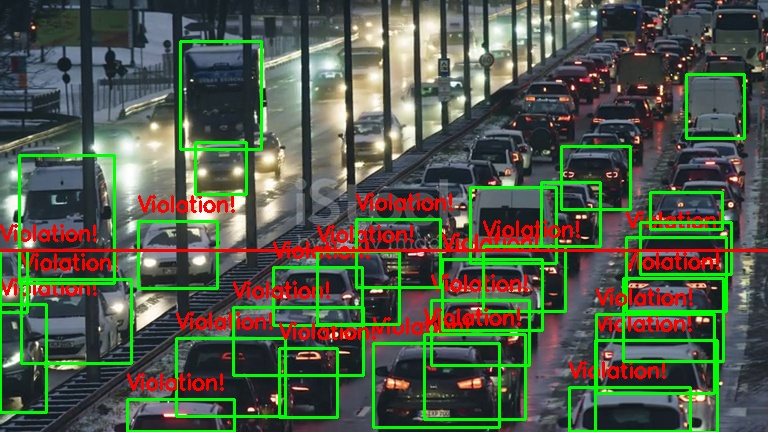

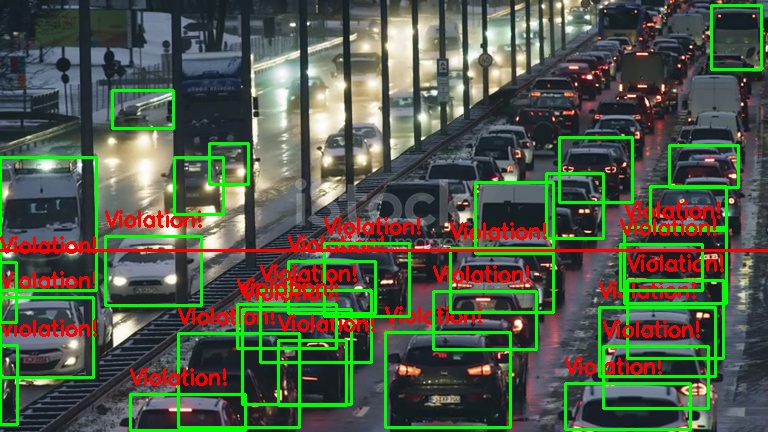

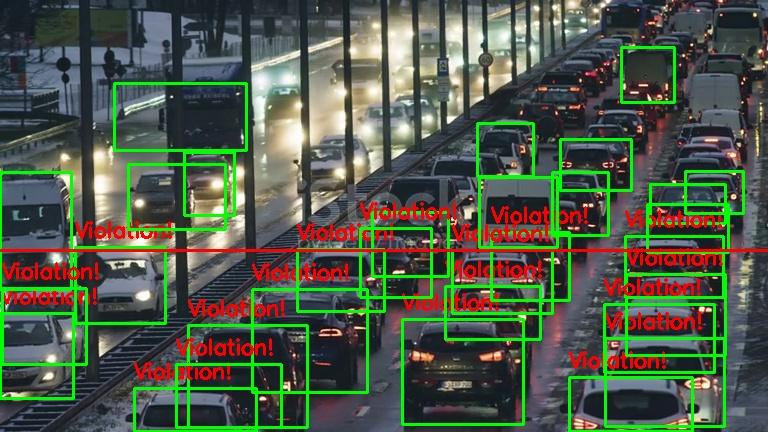

In [ ]:
import cv2
import time
import pandas as pd
from IPython.display import display, Image

# Get uploaded video filename
video_path = list(uploaded.keys())[0]

# Set red light line Y-coordinate
red_line_y = 250

# Initialize capture
cap = cv2.VideoCapture(video_path)

violations = []
frame_count = 0

while cap.isOpened() and frame_count < 300:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    results = model(frame)
    detections = results.pandas().xyxy[0]

    for _, det in detections.iterrows():
        x1, y1, x2, y2 = map(int, [det.xmin, det.ymin, det.xmax, det.ymax])
        cy = (y1 + y2) // 2
        label = det['name']
        conf = float(det['confidence'])

        # Draw box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)

        # Check if below red light line
        if cy > red_line_y:
            cv2.putText(frame, "Violation!", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            violations.append({'time': time.strftime('%Y-%m-%d %H:%M:%S'), 'vehicle': label, 'confidence': conf})

    # Draw red light line
    cv2.line(frame, (0, red_line_y), (frame.shape[1], red_line_y), (0,0,255), 2)

    # Show preview every 30 frames
    if frame_count % 30 == 0:
        cv2.imwrite("frame.jpg", frame)
        display(Image("frame.jpg"))

cap.release()


In [ ]:
df = pd.DataFrame(violations)
df.to_csv("violations_log.csv", index=False)
print("✅ Detection complete. Log saved as violations_log.csv")


✅ Detection complete. Log saved as violations_log.csv


In [ ]:
from google.colab import files
files.download("violations_log.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
df = pd.read_csv("violations_log.csv")
df.head()

,time,vehicle,confidence
0,2025-06-14 11:29:30,car,0.817099
1,2025-06-14 11:29:30,car,0.803790
2,2025-06-14 11:29:30,car,0.772734
3,2025-06-14 11:29:30,car,0.717184
4,2025-06-14 11:29:30,car,0.699809


In [ ]:
cap = cv2.VideoCapture(video_path)

In [ ]:
# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Create VideoWriter to save processed video
out = cv2.VideoWriter('output_violation_video.mp4',
                      cv2.VideoWriter_fourcc(*'mp4v'),
                      fps, (frame_width, frame_height))


In [ ]:
out.write(frame)

In [ ]:
out.release()
print("✅ Video saved as output_violation_video.mp4")


✅ Video saved as output_violation_video.mp4


In [ ]:
from google.colab import files
files.download("output_violation_video.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>